# 6.6 - Regresyon Problemleri ve Lineer Regresyon Modeli: Lineer Regresyon ile Tahmin

# Ev fiyatları modeli
## Model 1:
Bir önceki derste en iyi açıklama yüzdesine sahip model kullanılacaktır.<br>
Değişkenler: **["TotalBsmtSF", "OverallQual", "GrLivArea", "YearBuilt"]**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

title_font = {"family":"arial", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"sans", "weight":"normal", "color":"darkblue", "size":14}

house = pd.read_csv("house_prices.csv")

In [2]:
# Modelimizi oluşturalım:
x1 = house[["TotalBsmtSF", "OverallQual", "GrLivArea", "YearBuilt"]]
y1 = house["SalePrice"]

# Verilerimizi "test" ve "eğitim" olarak ikiye bölelim:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)    
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

print(f"Eğitim kümesindeki gözlem sayısı : {x1_train.shape[0]}")
print(f"Test kümesindeki gözlem sayısı   : {x1_test.shape[0]}")

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [3]:
# Eğitim verilerinin performansı
x1_train = sm.add_constant(x1_train)

results1_model = sm.OLS(y1_train, x1_train)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     857.3
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:56:08   Log-Likelihood:                -14001.
No. Observations:                1168   AIC:                         2.801e+04
Df Residuals:                    1163   BIC:                         2.804e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.27e+05   8.91e+04    -10.409      0.000    -1.1e+06   -7.52e+05
TotalBsmtSF    27.4830      3.177      8.652      0.000      21.250      33.715
OverallQual  2.215e+04   1279.415     17.315      0.000    1.96e+04    2.47e+04
GrLivArea      54.0964      2.832     19.100      0.000      48.540      59.653
YearBuilt     436.8474     46.874      9.320      0.000     344.881     528.814
==============================================================================
Omnibus:                      486.845   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42095.218
Skew:                          -0.989   Prob(JB):                         0.00
Kurtosis:                      32.344   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# Test verilerinin performansı
x1_test = sm.add_constant(x1_test)
y1_predict = results1.predict(x1_test)

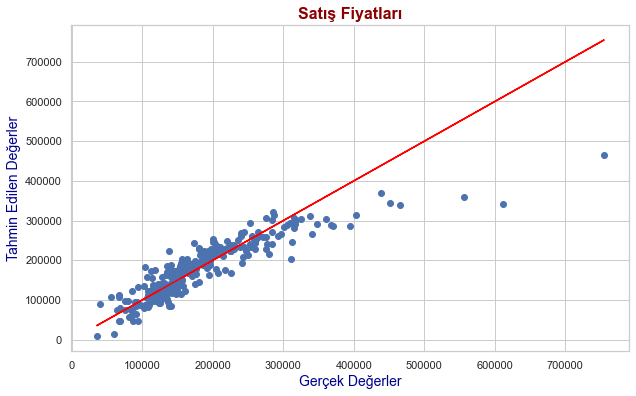

In [5]:
plt.scatter(y1_test, y1_predict)
plt.plot(y1_test, y1_test, color = "red")
plt.title("Satış Fiyatları", fontdict = title_font)
plt.xlabel("Gerçek Değerler", fontdict = axis_font)
plt.ylabel("Tahmin Edilen Değerler", fontdict = axis_font)

plt.show()

In [6]:
mae1 = mean_absolute_error(y1_test, y1_predict)
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
        # https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
mse1 = mse(y1_test, y1_predict)
    # https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html
rmse1 = rmse(y1_test, y1_predict)
    # https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html
    # https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
mape1 = (abs((y1_test - y1_predict)) / y1_test).mean() * 100

print(f"Ortalama Mutlak Hata (MAE)        : {mae1:.2f}")
print(f"Ortalama Kare Hata (MSE)          : {mse1:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE)     : {rmse1:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) : %{mape1:.2f}")

Ortalama Mutlak Hata (MAE)        : 25694.49
Ortalama Kare Hata (MSE)          : 1621325179.01
Kök Ortalama Kare Hata (RMSE)     : 40265.68
Ortalama Mutlak Yüzde Hata (MAPE) : %15.30


***
## Model 2
**ExterQual**, **BsmtQual** ve **GarageQual** kategorik değişkenleri numerik değerlere dönüştürüldü ve eklendi; 1. kat, 2. kat ve bodrum alanları toplandı, **TotalSF (Toplam Alan)** değişkeni oluşturuldu ve eklendi.

In [7]:
house.ExterQual = house.ExterQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, "Po":0})
house.BsmtQual = house.BsmtQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0})
house.GarageQual = house.GarageQual.replace({"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0, "Po":0})

house["TotalSF"] = house["TotalBsmtSF"] + house["1stFlrSF"] + house["2ndFlrSF"]

# Tüm verilerle modelin açıklanması
y2 = y1
x2 = house[["TotalSF", "OverallQual", "GrLivArea", "YearBuilt", 
             "ExterQual", "BsmtQual", "GarageQual"]]

In [8]:
# Modelimizi "test" ve "eğitim" verileri olarak ikiye bölelim.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

print(f"Eğitim kümesindeki gözlem sayısı : {x2_train.shape[0]}")
print(f"Test kümesindeki gözlem sayısı   : {x2_test.shape[0]}")

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [9]:
# Eğitim setimizin performansı
x2_train = sm.add_constant(x2_train)

results2_model = sm.OLS(y2_train, x2_train)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     528.0
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:56:09   Log-Likelihood:                -13966.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1160   BIC:                         2.799e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.386e+05   9.95e+04     -5.415      0.000   -7.34e+05   -3.43e+05
TotalSF        21.7989      3.163      6.892      0.000      15.593      28.005
OverallQual  1.613e+04   1443.225     11.178      0.000    1.33e+04     1.9e+04
GrLivArea      31.8704      4.616      6.905      0.000      22.815      40.926
YearBuilt     221.4817     52.946      4.183      0.000     117.601     325.363
ExterQual    1.856e+04   2935.536      6.323      0.000    1.28e+04    2.43e+04
BsmtQual     9500.7595   2212.145      4.295      0.000    5160.507    1.38e+04
GarageQual   6101.8638   2303.631      2.649      0.008    1582.114    1.06e+04
==============================================================================
Omnibus:                      481.215   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43819.810
Skew:                          -0.950   Prob(JB):                         0.00
Kurtosis:                      32.947   Cond. No.                     3.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

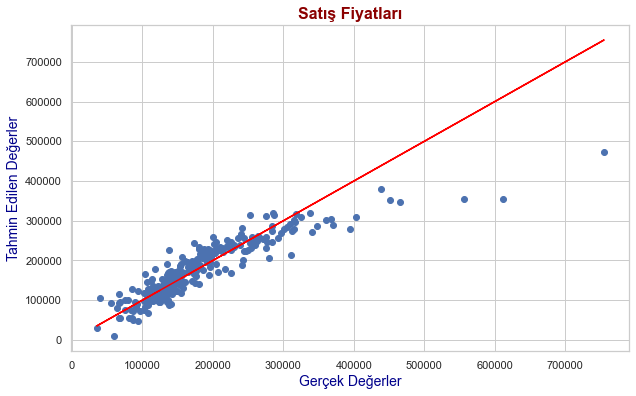

In [10]:
# Test verilerimizin performansı
x2_test = sm.add_constant(x2_test)
y2_predict = results2.predict(x2_test)

plt.scatter(y2_test, y2_predict)
plt.plot(y2_test, y2_test, color = "red")
plt.title("Satış Fiyatları", fontdict = title_font)
plt.xlabel("Gerçek Değerler", fontdict = axis_font)
plt.ylabel("Tahmin Edilen Değerler", fontdict = axis_font)

plt.show()

In [11]:
mae2 = mean_absolute_error(y2_test, y2_predict)
mse2 = mse(y2_test, y2_predict)
rmse2 = rmse(y2_test, y2_predict)
mape2 = (abs((y2_test - y2_predict)) / y2_test).mean() * 100

print(f"Ortalama Mutlak Hata (MAE)        : {mae2:.2f}")
print(f"Ortalama Kare Hata (MSE)          : {mse2:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE)     : {rmse2:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) : %{mape2:.2f}")

Ortalama Mutlak Hata (MAE)        : 24888.38
Ortalama Kare Hata (MSE)          : 1535513193.10
Kök Ortalama Kare Hata (RMSE)     : 39185.62
Ortalama Mutlak Yüzde Hata (MAPE) : %14.66


***
## İki modelin karşılaştırılması

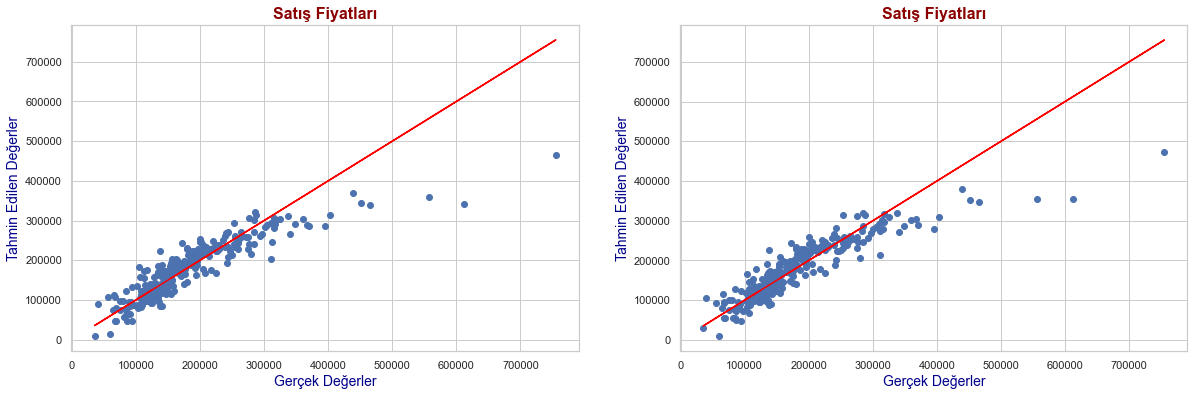

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(y1_test, y1_predict)
plt.plot(y1_test, y1_test, color = "red")
plt.title("Satış Fiyatları", fontdict = title_font)
plt.xlabel("Gerçek Değerler", fontdict = axis_font)
plt.ylabel("Tahmin Edilen Değerler", fontdict = axis_font)

plt.subplot(122)
plt.scatter(y2_test, y2_predict)
plt.plot(y2_test, y2_test, color = "red")
plt.title("Satış Fiyatları", fontdict = title_font)
plt.xlabel("Gerçek Değerler", fontdict = axis_font)
plt.ylabel("Tahmin Edilen Değerler", fontdict = axis_font)

plt.show()

## Yorumlar:
### Model 1:
* **$Adjusted R^2$ değeri** : 0.746
* **F-testi** : 857.3
* **Akaike Information Criterion (AIC)** : 28,010
* **Bayesian Information Criterion (BIC)** : 28,040

### Model 2:
* **$Adjusted R^2$ değeri** : 0.760
* **F-testi** : 528
* **Akaike Information Criterion (AIC)** : 27,950
* **Bayesian Information Criterion (BIC)** : 27,990

In [20]:
print("Model 2'nin, Model 1'den:")
print(f"Ortalama Mutlak Hata (MAE) Farkı        : %{100 * (mae2-mae1)/mae1:.2f}")
print(f"Ortalama Kare Hata (MSE) Farkı          : %{100 * (mse2-mse1)/mse1:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE) Farkı     : %{100 * (rmse2-rmse1)/rmse1:.2f}")
print(f"Ortalama Mutlak Yüzde Hata (MAPE) Farkı : %{100 * (mape2-mape1)/mape1:.2f}")

Model 2'nin, Model 1'den:
Ortalama Mutlak Hata (MAE) Farkı        : %-3.14
Ortalama Kare Hata (MSE) Farkı          : %-5.29
Kök Ortalama Kare Hata (RMSE) Farkı     : %-2.68
Ortalama Mutlak Yüzde Hata (MAPE) Farkı : %-4.19


## Sonuç:
* Model 1'in eğitim seti, tek başına yeterince başarılı bir sonuç ortaya koymakta, "Satış Fiyatı" varyansının %74.6'sını açıklamaktadır fakat %76'lık bir oranla Model 2'nin başarısı daha yüksektir. Ayrıca, $R^2$, AIC & BIC değerlerini dikkate aldığımızda, Model 2 yine başarısını ortaya koymaktadır.
* Her iki model de, düşük "Satış Fiyatı" değerlerinde, yüksek değerlerden daha iyi tahminler sergilemektedir. Veriler, çizginin düşük değerleri etrafında daha sık toplanmaktadır.
* Grafiklerde, her iki modelin de tahmin performansı neredeyse aynı gözükmektedir. Yine de metriklerden anlayabileceğimiz üzere, az da olsa Model 2'nin tahminlerindeki hata oranları daha düşüktür. \## 1) Metrikleri yorumlamak, 2 model arasında karşılaştırma yaparken kolay oluyor. Peki tek başlarına bir anlam ifade ediyorlar mı? 2) Bu %3, %5 hata azaltma değerleri önemli sayılabilir mi yoksa pek bir iyileştirme sağlamıyor mu?